In [2]:
# importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import re

from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering as AC
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [3]:
# sorting into truth table & adding labels

In [4]:
def add_labels_to_excel(a):
    labels = []
    for filename in a['file']:
        label = re.search("squeal|whinnie|softsnort|snort", filename)
        if label:
            label = label.group(0)
            labels.append(label)
    a['label'] = labels
    return a

def labels_to_Truth(df):
    a = pd.DataFrame(df['label'].replace(['squeal','snort', 'softsnort','whinnie'], [0,0,0,1]))
    b = pd.DataFrame(df['label'].replace(['squeal','snort', 'softsnort','whinnie'], [0,0,1,0]))
    c = pd.DataFrame(df['label'].replace(['squeal','snort', 'softsnort','whinnie'], [0,1,0,0]))
    d = pd.DataFrame(df['label'].replace(['squeal','snort', 'softsnort','whinnie'], [1,0,0,0])) #  replaces labels with truth table
    
    a = a.rename(columns = {'label':'whinnie'})
    b = b.rename(columns = {'label':'softsnort'})
    c = c.rename(columns = {'label':'snort'})
    d = d.rename(columns = {'label':'squeal'}) # replaces labels of each column with appropiate call label
    
    df = pd.concat([df.drop(['file','label'], axis=1),a, b, c, d], axis=1) # adds all dataframes together
    return df

In [5]:
# import data

In [6]:
df = add_labels_to_excel(pd.read_csv("C:/Users/hazze/Documents/Final Project/Assumptions.csv")) # all calls
df2 = add_labels_to_excel(pd.read_csv("C:/Users/hazze/Documents/Final Project/Assumptions_wh_sq.csv"))# whinnie & squeel with extra features

df  = labels_to_Truth(df) # all calls
df2 = labels_to_Truth(df2).drop(['softsnort', 'snort'], axis =1) # whinnie & squeel with extra features

In [8]:
# CLEANING:

In [9]:
# MinMaxScale

In [9]:
df_noT = df.drop(['q75','am.rate','am.extent','squeal','snort', 'softsnort','whinnie'], axis = 1)
#  keeping q50 fpeak duration am.var harmonicity

# scaling
min_max_scale = MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scale.fit_transform(df_noT)) # scaling
df_prepro = df_scaled.set_axis(df_noT.columns, axis=1) # readding column names # input to TSNE

df_scaled2 = pd.DataFrame(min_max_scale.fit_transform(df)) # scaling
df_prepro2 = df_scaled2.set_axis(df.columns, axis=1) # readding column names

In [10]:
# Dimensionality Reduction:

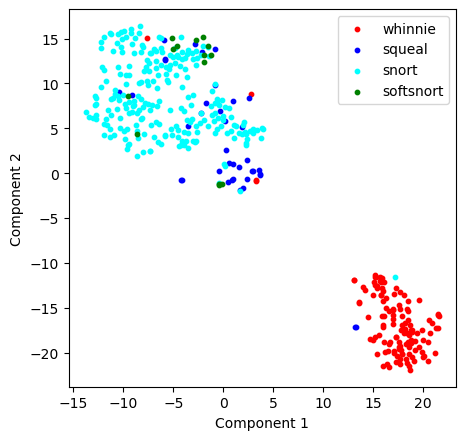

<Figure size 432x288 with 0 Axes>

In [11]:
#TSNE

tsne = TSNE(perplexity = 50)
U = tsne.fit_transform(df_prepro) # input

fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

wh = np.isin(df.loc[:, 'whinnie'], 1)
sq = np.isin(df.loc[:,'squeal'], 1)
s = np.isin(df.loc[:,'snort'], 1)
ss = np.isin(df.loc[:,'softsnort'], 1)

ax.scatter(U[wh, 0], U[wh, 1], s=10, c='r')
ax.scatter(U[sq, 0], U[sq, 1], s=10, c='b')
ax.scatter(U[s, 0], U[s, 1], s=10, c='aqua')
ax.scatter(U[ss, 0], U[ss, 1], s=10, c='green')

plt.legend(["whinnie", "squeal", "snort", "softsnort"])

plt.savefig('label_TSNE.png')
plt.figure()
plt.show()



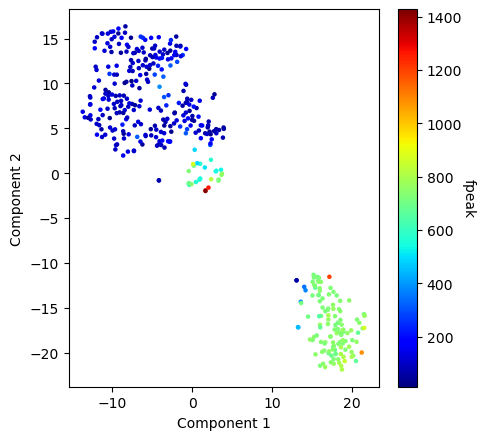

In [12]:
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')

sc = ax.scatter(U[:,0], U[:,1], s=5, 
                c=df_noT.loc[:, 'fpeak'], cmap='jet')
cbar = plt.colorbar(sc)
cbar.ax.set_ylabel('fpeak', rotation=270, labelpad=10)
plt.show()

In [13]:
# plotting function
def plot(model_label, name=0): # plots data with labels from model + to save plot when ready
    if name!=0:                # have to specify filename when you want to save a figure
        fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
        plt.scatter(U[:,0], U[:,1], s=5, c=model_label)
        plt.xlabel('Component 1')
        plt.ylabel("Component 2")
        plt.savefig(name+'.png') # to save the plot
        plt.show()
    else:
        fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
        plt.scatter(U[:,0], U[:,1], s=5, c=model_label)
        plt.xlabel('Component 1')
        plt.ylabel("Component 2")
        plt.show()

In [14]:
np.savetxt('INPUT.csv', U, delimiter=',')

# Clustering:

In [31]:
# Spectral Clustering

n_neighbors= 100 
Clusters= 4


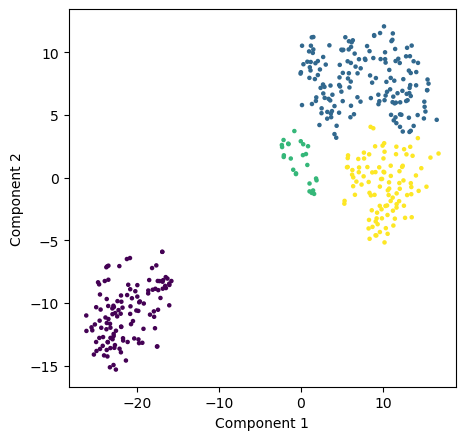

In [112]:
n_clusters=4
n_neighbors = 100
sc = SpectralClustering(n_clusters=n_clusters, n_neighbors=n_neighbors ).fit(U)

print('n_neighbors=', n_neighbors, '\nClusters=', 4)
plot(sc.labels_, name= 'SpectralClu_CL=4')

In [33]:
# DBSCAN

2.1176309843890464


<Figure size 360x360 with 0 Axes>

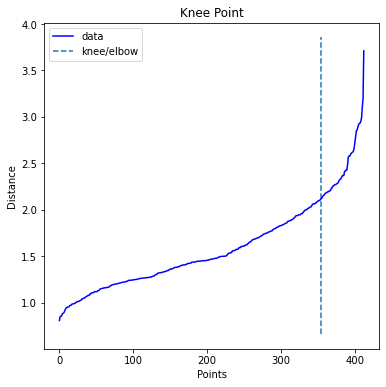

In [113]:
# elbow joint for eps
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(U)

distances, indices = neighbors.kneighbors(U)
distances = np.sort(distances[:,10], axis=0)

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.savefig('DBSCAN_ElbowJoint_'+str(distances[knee.knee])+'.png')

print(distances[knee.knee])

Estimated no. of clusters: 3
min_samples=


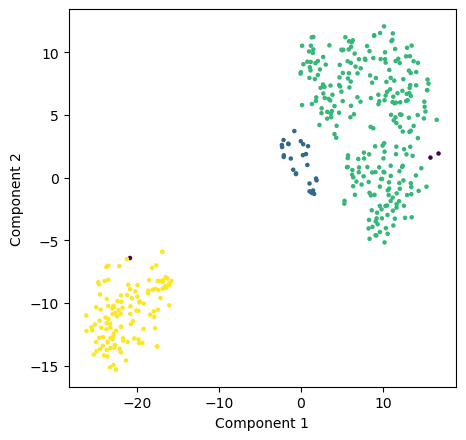

In [116]:
#for i in range(5,25,5):
dbscan_cluster1 = DBSCAN(eps=2.1176309843890464, min_samples=10)
dbscan_cluster1.fit(U)

# Visualizing DBSCAN
fig, ax = plt.subplots(1, figsize=(5, 5), dpi=100)
plt.scatter(U[:, 0], 
    U[:, 1], 
    c=dbscan_cluster1.labels_, s=5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)
print('min_samples=')#,i)
plt.xlabel('Component 1')
plt.ylabel("Component 2")
plt.savefig('DBSACN_CL=3.png')
plt.show()

In [21]:
#Algoramative

[['1.570437192916870117e+00' '6.426160335540771484e-01']
 ['3.592283964157104492e+00' '3.836620450019836426e-01']
 ['3.716568946838378906e+00' '-4.318229109048843384e-02']
 ['1.322725772857666016e+01' '-1.715199089050292969e+01']
 ['1.326253795623779297e+01' '-1.718168449401855469e+01']
 ['-7.752963304519653320e-01' '9.861186027526855469e+00']
 ['-1.045859909057617188e+01' '9.019450187683105469e+00']
 ['4.571416676044464111e-01' '-9.797445535659790039e-01']
 ['-5.865718364715576172e+00' '1.257456398010253906e+01']
 ['-4.181288242340087891e+00' '-7.872543931007385254e-01']
 ['-4.176553249359130859e+00' '-8.074102401733398438e-01']
 ['2.166101485490798950e-01' '5.841924667358398438e+00']
 ['-5.817533493041992188e+00' '1.274612331390380859e+01']
 ['-3.433774411678314209e-01' '6.949500560760498047e+00']
 ['9.781106114387512207e-01' '1.051786422729492188e+00']
 ['9.296745657920837402e-01' '8.078695297241210938e+00']
 ['2.976739704608917236e-01' '2.618028163909912109e+00']
 ['1.9283142089843

C:\Users\hazze\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  return f(**kwargs)


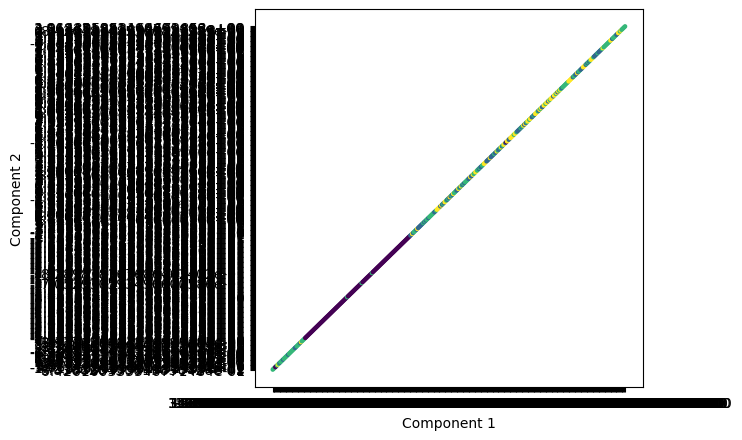

In [33]:
U = np.loadtxt("INPUT.csv",delimiter=',',dtype=str,encoding="utf-8-sig")
print(U)
AC1 = AC(n_clusters = 4).fit(U)
print('Clusters=',i)
plot(AC1.labels_,name = 'Algormative_CL=4')

In [23]:
# Affinity

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5000


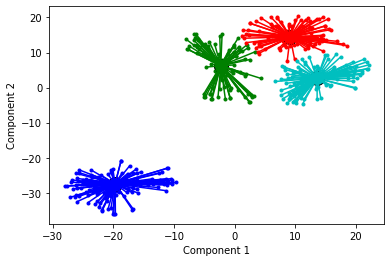

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5100


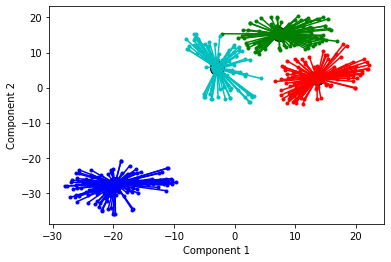

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5200


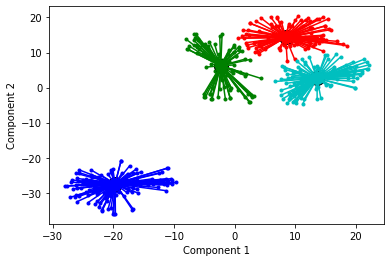

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5300


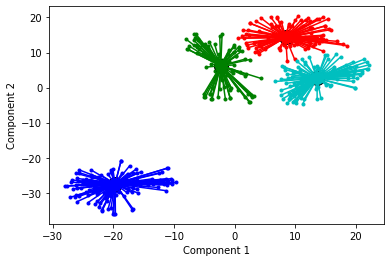

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5400


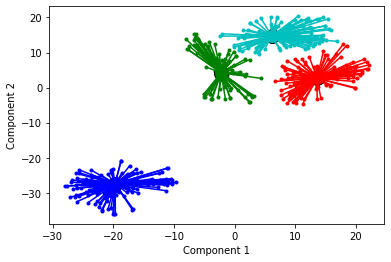

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5500


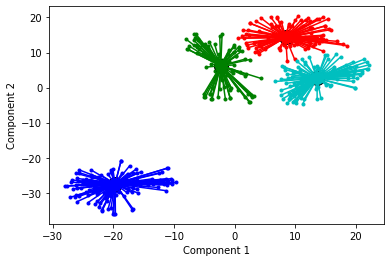

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5600


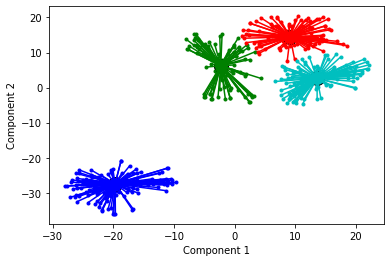

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5700


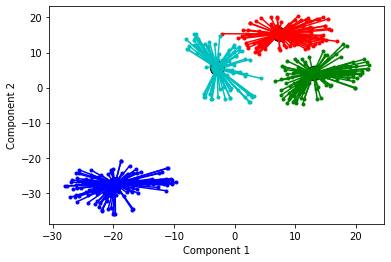

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5800


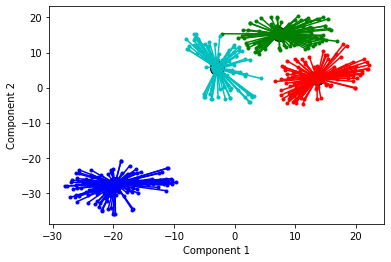

Estimated number of clusters= 4 
Damping= 0.7 
Preference= 5900


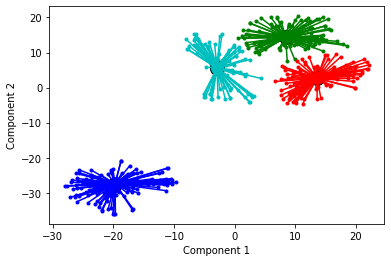

In [24]:
for i in range(5000,6000,100):
    damping = 0.7
    af = AffinityPropagation(damping = 0.7,preference=-i, random_state=0).fit(U)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)

    from itertools import cycle

    plt.close("all")
    plt.figure(1)
    plt.clf()

    colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = U[cluster_centers_indices[k]]
        plt.plot(U[class_members, 0], U[class_members, 1], col + ".")
        plt.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markeredgecolor="k",
            markersize=14,
        )
        for x in U[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    print("Estimated number of clusters=",n_clusters_ ,"\nDamping=", damping ,"\nPreference=", i)
    plt.xlabel('Component 1')
    plt.ylabel("Component 2")
    plt.show()

In [29]:
# KMeans

<Figure size 360x360 with 0 Axes>

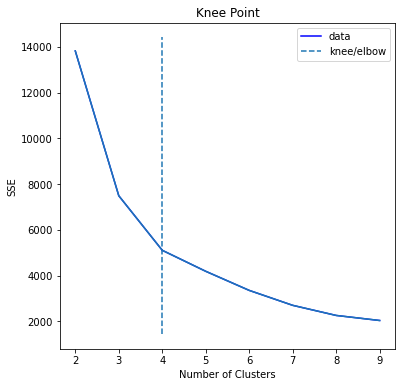

4

In [29]:
U = np.loadtxt("INPUT.csv",delimiter=',',dtype=str,encoding="utf-8-sig")

sse = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters = i).fit(U)
    #km = KMeans(n_clusters = i).fit(U)
    sse.append(kmeans.inertia_)

#plt.style.use("fivethirtyeight")
fig = plt.figure(figsize=(5, 5))

kl = KneeLocator(range(2, 10), sse, curve="convex", direction="decreasing")
kl.plot_knee()
plt.plot(range(2, 10), sse)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.savefig('KMeans_Elbow'+str(kl.elbow))
plt.show()


kl.elbow

Clusters= 3


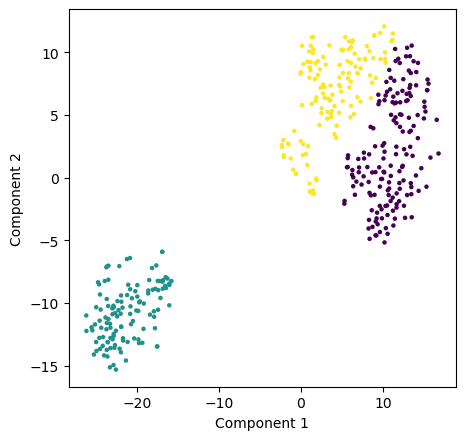

Clusters= 4


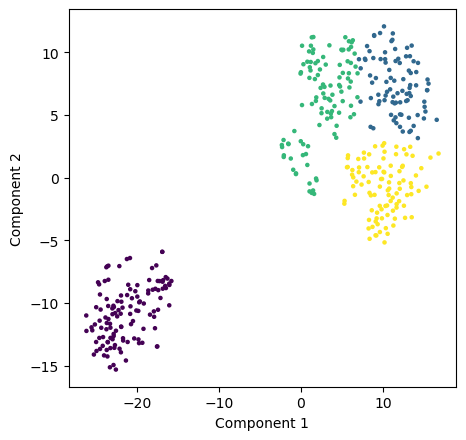

In [118]:
for i in (3,4):
    km = KMeans(n_clusters = i).fit(U)
    print('Clusters=',i)
    plot(km.labels_, name = 'KMeans_CL='+str(i))